1) Fit-predict https://www.kaggle.com/rahulsah06/titanic?select=train.csv

2) Feature importance

3) Loss function & optimization (философия)

4) Кластеризация

5) Работа с неструктурированными данными (tf-idf, word2vec), эмбеддинги

In [66]:
import pandas as pd
import warnings
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


разбиваем выборку на данные и целевую переменную

In [49]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp']]
y = train['Survived']

приведем пол к числовому варианту

In [50]:
X = pd.get_dummies(X)

In [51]:
X.head()

,Pclass,Age,SibSp,Sex_female,Sex_male
0,3,22.0,1,0,1
1,1,38.0,1,1,0
2,3,26.0,0,1,0
3,1,35.0,1,1,0
4,3,35.0,0,0,1


разбиваем данные на трейн и валидацию (тест, но на который есть ответы чтоб измерить качество)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
X_train.shape

(668, 5)

In [54]:
X_test.shape

(223, 5)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Sex_female  891 non-null    uint8  
 4   Sex_male    891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(2)
memory usage: 22.7 KB


заполняем пустые значения на среднее

In [56]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 787 to 856
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Sex_female  668 non-null    uint8  
 4   Sex_male    668 non-null    uint8  
dtypes: float64(1), int64(2), uint8(2)
memory usage: 22.2 KB


In [58]:
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

Обучение модели

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

lg = LogisticRegression(C=10)
lg.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

mlp = MLPClassifier(hidden_layer_sizes=())
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=())

предстказание

In [90]:
lg_prediction = lg.predict(X_test[X_train.columns])
rf_prediction = rf.predict(X_test[X_train.columns])
mlp_prediction = mlp.predict(X_test[X_train.columns])

Измеряем качество

In [91]:
from sklearn.metrics import accuracy_score

print("Log regression accuracy:", accuracy_score(y_test, lg_prediction))
print("Random forest accuracy:", accuracy_score(y_test, rf_prediction))
print("Neural network accuracy:", accuracy_score(y_test, mlp_prediction))

Log regression accuracy: 0.7892376681614349
Random forest accuracy: 0.7802690582959642
Neural network accuracy: 0.7354260089686099


In [76]:
X_test['prediction'] = prediction
X_test['target'] = y_test

In [77]:
X_test.head()

,Pclass,Age,SibSp,Sex_female,Sex_male,prediction,target
105,3,28.000000,0,0,1,0,0
225,3,22.000000,0,0,1,0,0
214,3,31.299133,1,0,1,0,0
111,3,14.500000,1,1,0,1,0
666,2,25.000000,0,0,1,0,0


<AxesSubplot:>

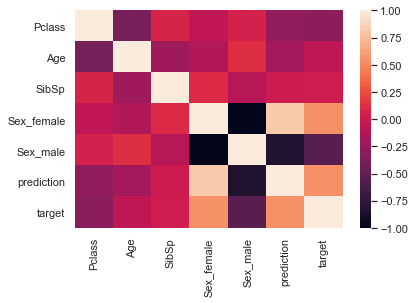

In [78]:
sns.heatmap(X_test.corr())

feature importance

In [94]:
list(zip(X_train.columns, lg.coef_[0]))

[('Pclass', -1.146392502033625),
 ('Age', -0.0408314304426456),
 ('SibSp', -0.4059302750224392),
 ('Sex_female', 1.3451359235116849),
 ('Sex_male', -1.3455626541834618)]

In [96]:
list(zip(X_train.columns, rf.feature_importances_))

[('Pclass', 0.13352670339561806),
 ('Age', 0.44210228266572793),
 ('SibSp', 0.082035233791149),
 ('Sex_female', 0.18970117580466628),
 ('Sex_male', 0.15263460434283885)]

Универсальный метод: https://github.com/slundberg/shap

# Кластеризация

In [114]:
iris = pd.read_csv('Iris.csv').drop(['Id'], axis=1)

In [115]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [118]:
X.shape

(150, 4)

In [106]:
from sklearn.cluster import k_means

In [119]:
marks = k_means(X, 3)[1]

In [120]:
marks

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [121]:
iris['cluster'] = marks

In [125]:
pd.DataFrame(iris[['Species', 'cluster']].value_counts())

0
Species         cluster    
Iris-setosa     0        50
Iris-versicolor 1        48
Iris-virginica  2        36
                1        14
Iris-versicolor 2         2

как посмотреть на облака кластеров (понижение размерности)

In [140]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=20.0).fit_transform(np.array(X))

<AxesSubplot:>

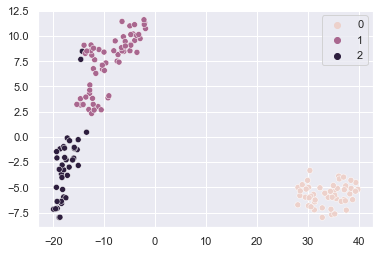

In [142]:
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=marks)

In [143]:
28**2

784

In [144]:
from sklearn.ensemble import RandomForestRegressor